In [1]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/kaks/.config/matplotlib/matplotlibrc'

<Figure size 1500x1200 with 0 Axes>

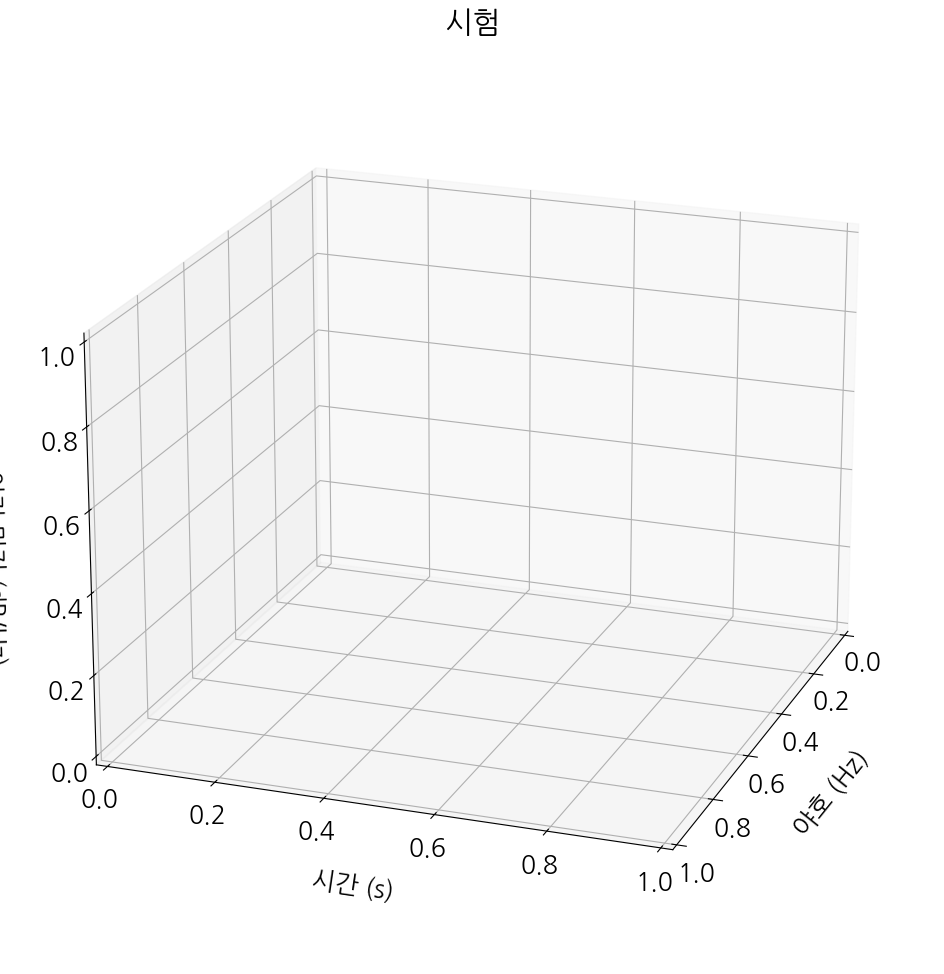

In [3]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# 테스트 해보기
fig = plt.figure(figsize=(15, 12))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15, 12))

graph_title = '시험'
ax.set_title(f'{graph_title}')
ax.set_xlabel('야호 (Hz)', labelpad=20)
ax.set_ylabel('시간 (s)', labelpad=20)
ax.set_zlabel('이건 뭐지 (dB/Hz)', labelpad=20)

ax.view_init(20, 20)
plt.show()

In [4]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
# import matplotlib
# matplotlib.rc("font", family="Malgun Gothic")
# matplotlib.rcParams["axes.unicode_minus"] = False

from pathlib import Path
IMAGE_PATH = Path() / "images"/ "svm"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumGothic']

In [6]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Nanum' in i.name:
        print(i.name, i.fname)

NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [7]:
print(plt.rcParams['font.family'] )

['NanumGothic']


In [8]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

In [9]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [10]:
setosa_or_versicolor = (y==0) | (y==1)

In [11]:
X = X[setosa_or_versicolor]

In [12]:
y = y [setosa_or_versicolor]

In [13]:
svm_clf = SVC(kernel="linear", C=10 **9)
svm_clf.fit(X, y)

SVC(C=1000000000, kernel='linear')

In [14]:
X0 = np.linspace(0, 5.5, 200)
pred_1 = 5 *X0 - 20
pred_2 = X0 - 1.8
pred_3 = 0.1 * X0 + 0.5

In [15]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 -b /w[1]

    margin  = 1/ w[1]
    gutter_up = decision_boundary +margin
    gutter_down = decision_boundary -margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolor="#AAA", zorder=-1)

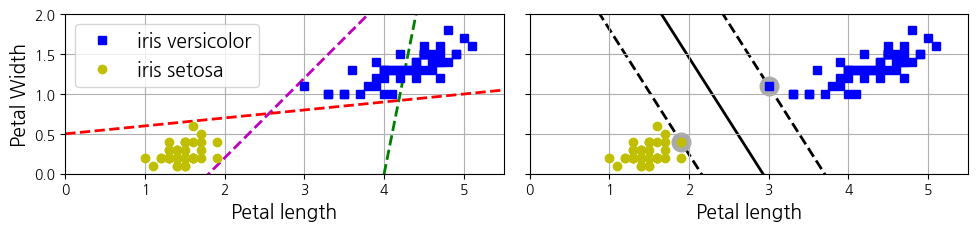

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True )

plt.sca(axes[0])
plt.plot(X0, pred_1, "g--", linewidth=2)
plt.plot(X0, pred_2, "m--", linewidth=2)
plt.plot(X0, pred_3, "r--", linewidth=2)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5,60]]).astype(np.float64)
ys = np.array([0, 0, 1,1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

In [18]:
scaler=  StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

/tmp/ipykernel_1457/204500870.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1457/204500870.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
/home/kaks/miniconda3/envs/koreait/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


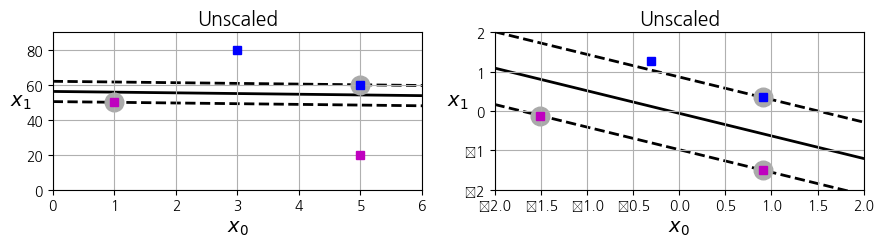

In [19]:


plt.figure(figsize=(9 ,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bs" )
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.axis([0, 6, 0, 90])
plt.title("Unscaled")
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bs" )
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.axis([-2, 2, -2,2])
plt.title("Unscaled")
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

In [20]:
X_outlier = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outlier = np.array([0, 0])

In [22]:
Xo1 = np.concatenate([X, X_outlier[:1]], axis=0)
yo1 = np.concatenate([y, y_outlier[:1]], axis=0)
Xo2 = np.concatenate([X, X_outlier[1:]], axis=0)
yo2 = np.concatenate([y, y_outlier[1:]], axis=0)

In [23]:
svm_clf2 = SVC(kernel="linear", C= 10**9)
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, kernel='linear')

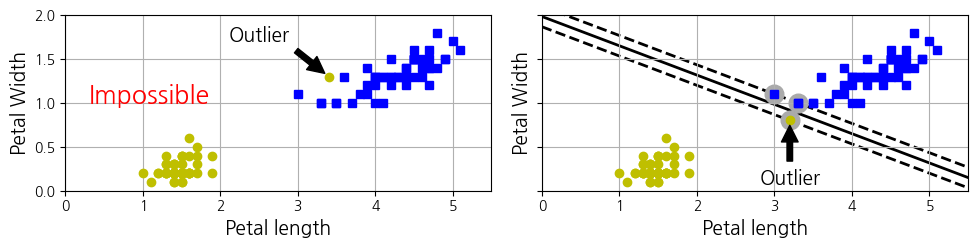

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])

plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0 , "Impossible", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.annotate("Outlier", xy=(X_outlier[0,0], X_outlier[0, 1]), 
             xytext=(2.5, 1.7),ha="center", arrowprops=dict(facecolor="black", shrink=0.1))
 
plt.axis([0, 5.5, 0, 2])
 
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.annotate("Outlier", xy=(X_outlier[1,0], X_outlier[1, 1]), 
             xytext=(3.2, 0.08),
             ha="center", arrowprops=dict(facecolor="black", shrink=0.1))
 
plt.axis([0, 5.5, 0, 2])
 
plt.grid()
save_fig("sensitivity_to_outlier_plot")
plt.show()

In [26]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
 

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target ==2)
svm_clf = make_pipeline(StandardScaler(), 
                        LinearSVC(C=1, dual=True, random_state=42))



In [27]:
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [28]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [29]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [30]:
svm_clf1 = LinearSVC(C=1,max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100,max_iter=10_000, dual=True, random_state=42)

In [31]:
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

In [32]:
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=100, dual=True, max_iter=10000, random_state=42))])

In [33]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

In [34]:
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])

In [35]:
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

In [37]:
t = y * 2 -1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).to_numpy()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).to_numpy()

In [38]:
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


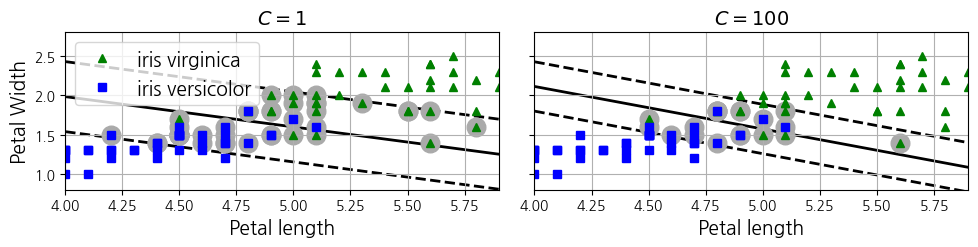

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)

plt.xlabel("Petal length")
plt.ylabel("Petal Width")

plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])

plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()
save_fig("regularization_plot")
plt.show()

In [40]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D **2]

In [41]:
y = np.array([0, 0, 1,1,1,1,1,0,0])

/tmp/ipykernel_1457/204500870.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
/home/kaks/miniconda3/envs/koreait/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


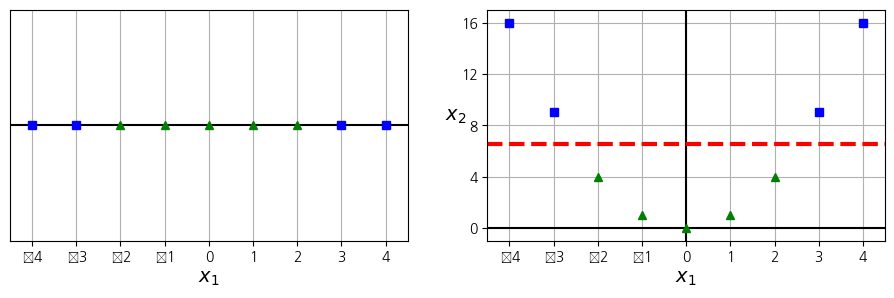

In [42]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.plot(X2D[:, 0][y==0],   X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1],   X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.gca().get_yaxis().set_ticks([0 ,4, 8, 12 , 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])
plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

In [43]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [44]:
X, y = make_moons(n_samples= 100, noise=0.15, random_state=42)

In [45]:
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                                   StandardScaler(),
                                   LinearSVC(C=10, max_iter=10_000,
                                             dual=True, random_state=42))

In [46]:
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

In [47]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:,1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:,1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

In [48]:
def plot_predictions(clf, axes):
    x0s, x1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X = np.c_[x0s.ravel(), x1s.ravel()]
    
    y_pred = clf.predict(X).reshape(x0s.shape)
    y_decisison = clf.decision_function(X).reshape(x0s.shape)
    plt.contourf(x0s, x1s, y_pred, alpha=0.2, cmap=plt.cm.brg)
    plt.contourf(x0s, x1s, y_decisison, alpha=0.1,  cmap=plt.cm.brg)

/tmp/ipykernel_1457/204500870.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1457/204500870.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
/home/kaks/miniconda3/envs/koreait/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


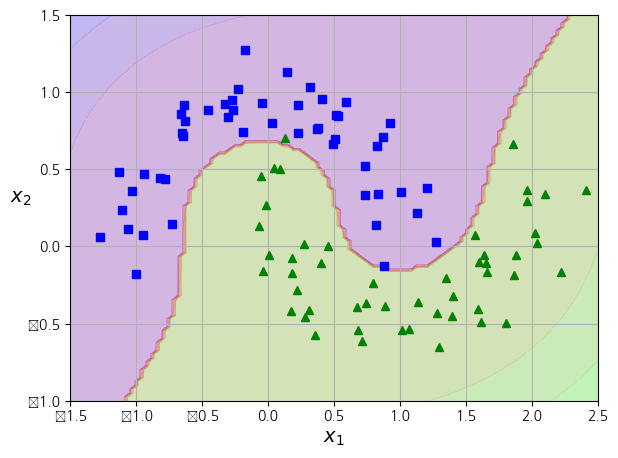

In [49]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y , [-1.5, 2.5, -1, 1.5])
save_fig("moons_polynomial_svc_plot")
plt.show()

In [50]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3,
                                        coef0=1, C=5))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [51]:
poly100_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=10,
                                        coef0=100, C=5))
poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

/tmp/ipykernel_1457/204500870.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1457/204500870.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
/home/kaks/miniconda3/envs/koreait/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


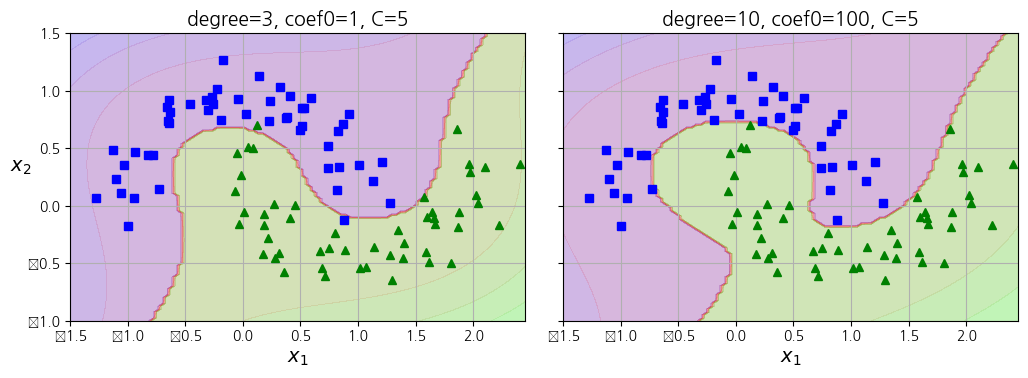

In [52]:
fig, axes =  plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y ,[-1.5, 2.45, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y ,[-1.5, 2.45, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

In [53]:
gamma = 0.3
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x- landmark, axis=1)**2)

In [54]:
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1,1)
x2s = gaussian_rbf(x1s, -2,gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

In [55]:
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]

In [56]:
yk = np.array([0, 0, 1,1,1,1,1,0,0])

/tmp/ipykernel_1457/204500870.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1457/204500870.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
/home/kaks/miniconda3/envs/koreait/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


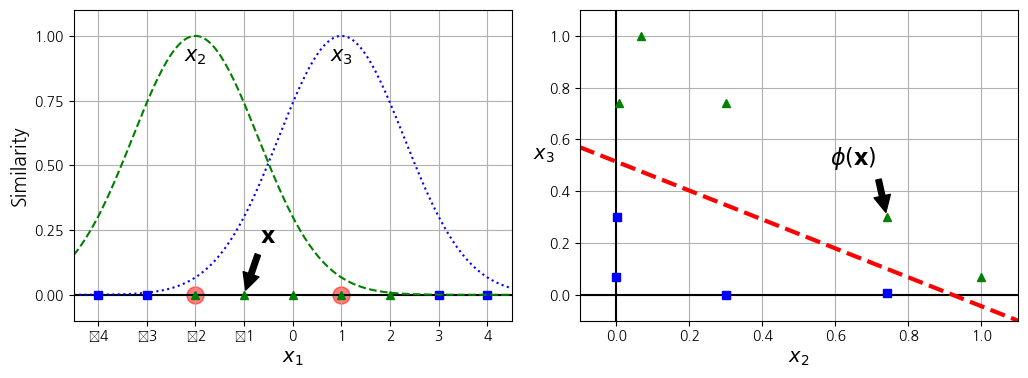

In [59]:
plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(r"$\mathbf{x}$", xy=(X1D[3,0], 0),
             xytext=(-.5, 0.2),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=16)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9 , "$x_3$", ha="center",fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.plot(XK[:, 0][yk==0],   XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1],   XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$", rotation=0)
plt.annotate(r"$\phi\left(\mathbf{x}\right)$",
              xy=(XK[3, 0], XK[3,1]),
             xytext=(0.65, 0.5),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=16)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -.1, 1.1])
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot" )
plt.show()